### On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.
#  An Exploration of Why Employees Choose to Leave Food Service Jobs

#### Group Members:  Brian Arthaud-Day, Gene Barnes, Wenhao Zhang

## Introduction
The data analysis below is seeking to understand what are some potential predictors of dissatisfaction for employees in the food service industry, leading to their decision to leave a position. 

##  Rationale for the Study
1. Turnover rate in the hospitality industry reaches over 70% in 2016 (National Restaurant Association, 2017). Therefore we are interested in examining the antecedents of why restaurant employees leave their organizations.

2. More specifically, we examine how polychronicity (a person's preference on conducting multiple activities simultaneously), work engagement, job satisfaction, organizational identification, and job perforamnce influence restaurant servers' decision of leaving their job.  

3. This study consists of 244 participants recruited from Qualtris. Participants are all full-time restaurant employees who are in non-supervisory roles working in full-service restaurant throughout the United States. 

4. In the questionnair, **polychronicity** was measured by 9 qestions, sample questions including “I like to juggle several activities at the same time”, “I prefer to do one thing at a time (reversed scored)”. 
**Job satisfaction** was measured by 5 questions including "I consider my job pleasant", "I find real enjoyment in my work".
**Work engagement** was measured withh 9 questions including “When I get up in the morning, I feel like going to work”, “At my work, I feel bursting with energy”. 
**Job performance** was measured with 7 questions including "I am a top performer".
**Organization identification** was measured with 6 questions including "Our restaurant’s success is my success".
**Turnover intention** was measured with 6 questions including "It is very likely that I will actively look for a new job in the next year."
All questions were measured with a seven-point scale, from 1 (strongly disagree) to 7 (strongly agree).  
**Demographic questions** include Gender, Ethnicity, Marital Status, Education, Tenure, and Income. 


In [0]:
# Install package for working with Google Sheets
!pip install --upgrade -q gspread
!pip install WordCloud

# import necessary Python packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import requests
#from lxml import html

# Authenticate User
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())


In [2]:
# Open 'Data' worksheet from Google Sheets and read some data.
worksheet = gc.open('Data').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print rows

# Convert to a DataFrame and render.
df_raw = pd.DataFrame.from_records(rows)
df_raw.head()

[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'WE1', 'WE2', 'WE3', 'WE4', 'WE5', 'WE6', 'WE7', 'WE8', 'WE9', 'TI1', 'TI2', 'TI3', 'TI4', 'TI5', 'TI6', 'JP1', 'JP2', 'JP3', 'JP4', 'JP5', 'JP6', 'JP7', 'OI1', 'OI2', 'OI3', 'OI4', 'OI5', 'OI6', 'Age', 'Gender', 'Ethnicity', 'Marital_Status', 'Education', 'Tenure', 'Income'], ['7', '6', '6', '5', '6', '6', '7', '7', '6', '5', '4', '5', '4', '6', '5', '5', '6', '7', '6', '5', '4', '5', '6', '7', '6', '4', '5', '6', '7', '6', '7', '6', '5', '6', '5', '4', '5', '6', '7', '6', '5', '4', '5', '2', '2', '4', '3', '1', '2', '1'], ['3', '4', '5', '5', '5', '4', '4', '4', '4', '5', '4', '4', '5', '5', '5', '5', '6', '5', '5', '6', '5', '5', '6', '5', '5', '6', '5', '5', '4', '5', '4', '5', '5', '5', '5', '4', '5', '5', '4', '5', '5', '5', '5', '4', '2', '5', '4', '6', '4', '4'], ['6', '2', '5', '6', '6', '3', '3', '7', '2', '3', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,OI4,OI5,OI6,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income
1,7,6,6,5,6,6,7,7,6,5,...,5,4,5,2,2,4,3,1,2,1
2,3,4,5,5,5,4,4,4,4,5,...,5,5,5,4,2,5,4,6,4,4
3,6,2,5,6,6,3,3,7,2,3,...,7,7,7,4,1,4,1,6,3,5
4,7,7,7,7,6,7,6,5,6,7,...,7,7,5,2,1,4,1,8,2,5


In [3]:
#The above data has the column labels listed as the first row of data.
#We need to convert the data to have the column headings.
new_header = df_raw.iloc[0]
df_raw = df_raw[1:] #take the data less the header row
df_raw.columns = new_header #set the header row as the df header
df_raw.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,OI4,OI5,OI6,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income
1,7,6,6,5,6,6,7,7,6,5,...,5,4,5,2,2,4,3,1,2,1
2,3,4,5,5,5,4,4,4,4,5,...,5,5,5,4,2,5,4,6,4,4
3,6,2,5,6,6,3,3,7,2,3,...,7,7,7,4,1,4,1,6,3,5
4,7,7,7,7,6,7,6,5,6,7,...,7,7,5,2,1,4,1,8,2,5
5,5,1,2,2,3,5,6,6,6,6,...,4,5,6,4,1,4,3,2,5,5


In [4]:
df_raw = df_raw.astype(str).astype(float)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 1 to 244
Data columns (total 50 columns):
P1                244 non-null float64
P2                244 non-null float64
P3                244 non-null float64
P4                244 non-null float64
P5                244 non-null float64
P6                244 non-null float64
P7                244 non-null float64
P8                244 non-null float64
P9                244 non-null float64
P10               244 non-null float64
JS1               244 non-null float64
JS2               244 non-null float64
JS3               244 non-null float64
JS4               244 non-null float64
JS5               244 non-null float64
WE1               244 non-null float64
WE2               244 non-null float64
WE3               244 non-null float64
WE4               244 non-null float64
WE5               244 non-null float64
WE6               244 non-null float64
WE7               244 non-null float64
WE8               244 non-null float6

In [5]:
# Create separate dataframe for all JP-related data (JP = Job Performance)
# Add the Mean value for this variable

df_jp = df_raw.drop(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','JS1','JS2','JS3', 'JS4','JS5','WE1','WE2','WE3','WE4','WE5','WE6','WE7','WE8','WE9','TI1','TI2','TI3','TI4','TI5','TI6','OI1','OI2','OI3','OI4','OI5','OI6'],axis = 1)
df_jp['JPMean'] = df_jp.mean(axis=1)
df_jp.head()

,JP1,JP2,JP3,JP4,JP5,JP6,JP7,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income,JPMean
1,7.0,6.0,5.0,6.0,5.0,4.0,5.0,2.0,2.0,4.0,3.0,1.0,2.0,1.0,3.785714
2,4.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,4.0,6.0,4.0,4.0,4.428571
3,7.0,7.0,7.0,7.0,7.0,7.0,7.0,4.0,1.0,4.0,1.0,6.0,3.0,5.0,5.214286
4,5.0,6.0,6.0,7.0,7.0,6.0,5.0,2.0,1.0,4.0,1.0,8.0,2.0,5.0,4.642857
5,6.0,5.0,6.0,5.0,7.0,6.0,4.0,4.0,1.0,4.0,3.0,2.0,5.0,5.0,4.500000


In [6]:
# Create separate dataframe for all P-related data (P = Polychronicity)
# Add the Mean value for this variable

df_poly = df_raw.drop(['JP1','JP2','JP3','JP4','JP5','JP6','JP7','JS1','JS2','JS3', 'JS4','JS5','WE1','WE2','WE3','WE4','WE5','WE6','WE7','WE8','WE9','TI1','TI2','TI3','TI4','TI5','TI6','OI1','OI2','OI3','OI4','OI5','OI6'],axis = 1)
df_poly['PMean'] = df_poly.mean(axis=1)
df_poly.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income,PMean
1,7.0,6.0,6.0,5.0,6.0,6.0,7.0,7.0,6.0,5.0,2.0,2.0,4.0,3.0,1.0,2.0,1.0,4.470588
2,3.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,4.0,6.0,4.0,4.0,4.235294
3,6.0,2.0,5.0,6.0,6.0,3.0,3.0,7.0,2.0,3.0,4.0,1.0,4.0,1.0,6.0,3.0,5.0,3.941176
4,7.0,7.0,7.0,7.0,6.0,7.0,6.0,5.0,6.0,7.0,2.0,1.0,4.0,1.0,8.0,2.0,5.0,5.176471
5,5.0,1.0,2.0,2.0,3.0,5.0,6.0,6.0,6.0,6.0,4.0,1.0,4.0,3.0,2.0,5.0,5.0,3.882353


In [7]:
# Create separate dataframe for all JS-related data (JS = Job Satisfaction)
# Add the Mean value for this variable

df_js = df_raw.drop(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','JP1','JP2','JP3','JP4','JP5','JP6','JP7','WE1','WE2','WE3','WE4','WE5','WE6','WE7','WE8','WE9','TI1','TI2','TI3','TI4','TI5','TI6','OI1','OI2','OI3','OI4','OI5','OI6'],axis = 1)
df_js['JSMean'] = df_js.mean(axis=1)
df_js.head()

,JS1,JS2,JS3,JS4,JS5,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income,JSMean
1,4.0,5.0,4.0,6.0,5.0,2.0,2.0,4.0,3.0,1.0,2.0,1.0,3.250000
2,4.0,4.0,5.0,5.0,5.0,4.0,2.0,5.0,4.0,6.0,4.0,4.0,4.333333
3,7.0,7.0,7.0,7.0,7.0,4.0,1.0,4.0,1.0,6.0,3.0,5.0,4.916667
4,6.0,7.0,6.0,7.0,7.0,2.0,1.0,4.0,1.0,8.0,2.0,5.0,4.666667
5,6.0,6.0,7.0,6.0,6.0,4.0,1.0,4.0,3.0,2.0,5.0,5.0,4.583333


In [8]:
# Create separate dataframe for all WE-related data (WE = Work Engagement)
# Add the Mean value for this variable

df_we = df_raw.drop(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','JP1','JP2','JP3','JP4','JP5','JP6','JP7','JS1','JS2','JS3', 'JS4','JS5','TI1','TI2','TI3','TI4','TI5','TI6','OI1','OI2','OI3','OI4','OI5','OI6'],axis = 1)
df_we['WEMean'] = df_we.mean(axis=1)
df_we.head() 

,WE1,WE2,WE3,WE4,WE5,WE6,WE7,WE8,WE9,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income,WEMean
1,5.0,6.0,7.0,6.0,5.0,4.0,5.0,6.0,7.0,2.0,2.0,4.0,3.0,1.0,2.0,1.0,4.1250
2,5.0,6.0,5.0,5.0,6.0,5.0,5.0,6.0,5.0,4.0,2.0,5.0,4.0,6.0,4.0,4.0,4.8125
3,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,4.0,1.0,4.0,1.0,6.0,3.0,5.0,5.4375
4,7.0,6.0,7.0,7.0,5.0,7.0,6.0,7.0,7.0,2.0,1.0,4.0,1.0,8.0,2.0,5.0,5.1250
5,6.0,5.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,4.0,1.0,4.0,3.0,2.0,5.0,5.0,4.5000


In [9]:
# Create separate dataframe for all TI-related data (TI = Turnover Intention)
# Add the Mean value for this variable

df_ti = df_raw.drop(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','JS1','JS2','JS3', 'JS4','JS5','WE1','WE2','WE3','WE4','WE5','WE6','WE7','WE8','WE9','JP1','JP2','JP3','JP4','JP5','JP6','JP7','OI1','OI2','OI3','OI4','OI5','OI6'],axis = 1)
df_ti['TIMean'] = df_ti.mean(axis=1)
df_ti.head()

,TI1,TI2,TI3,TI4,TI5,TI6,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income,TIMean
1,6.0,4.0,5.0,6.0,7.0,6.0,2.0,2.0,4.0,3.0,1.0,2.0,1.0,3.769231
2,5.0,6.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,4.0,6.0,4.0,4.0,4.538462
3,1.0,5.0,6.0,6.0,6.0,6.0,4.0,1.0,4.0,1.0,6.0,3.0,5.0,4.153846
4,6.0,6.0,7.0,7.0,7.0,7.0,2.0,1.0,4.0,1.0,8.0,2.0,5.0,4.846154
5,1.0,2.0,2.0,6.0,1.0,2.0,4.0,1.0,4.0,3.0,2.0,5.0,5.0,2.923077


In [10]:
# Create separate dataframe for all OI-related data (OI = Organization Identification)
# Add the Mean value for this variable

df_oi = df_raw.drop(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','JS1','JS2','JS3', 'JS4','JS5','WE1','WE2','WE3','WE4','WE5','WE6','WE7','WE8','WE9','TI1','TI2','TI3','TI4','TI5','TI6','JP1','JP2','JP3','JP4','JP5','JP6','JP7'],axis = 1)
df_oi['OIMean'] = df_oi.mean(axis=1)
df_oi.head()

,OI1,OI2,OI3,OI4,OI5,OI6,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income,OIMean
1,6.0,7.0,6.0,5.0,4.0,5.0,2.0,2.0,4.0,3.0,1.0,2.0,1.0,3.692308
2,5.0,4.0,5.0,5.0,5.0,5.0,4.0,2.0,5.0,4.0,6.0,4.0,4.0,4.461538
3,7.0,7.0,7.0,7.0,7.0,7.0,4.0,1.0,4.0,1.0,6.0,3.0,5.0,5.076923
4,5.0,6.0,7.0,7.0,7.0,5.0,2.0,1.0,4.0,1.0,8.0,2.0,5.0,4.615385
5,3.0,4.0,5.0,4.0,5.0,6.0,4.0,1.0,4.0,3.0,2.0,5.0,5.0,3.923077


In [11]:
# Create separate dataframe for all demographic data
# No Mean is collected for these variables

df_demo = df_raw.drop(['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','JS1','JS2','JS3', 'JS4','JS5','WE1','WE2','WE3','WE4','WE5','WE6','WE7','WE8','WE9','TI1','TI2','TI3','TI4','TI5','TI6','JP1','JP2','JP3','JP4','JP5','JP6','JP7','OI1','OI2','OI3','OI4','OI5','OI6'],axis = 1)
df_demo.head()

,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income
1,2.0,2.0,4.0,3.0,1.0,2.0,1.0
2,4.0,2.0,5.0,4.0,6.0,4.0,4.0
3,4.0,1.0,4.0,1.0,6.0,3.0,5.0
4,2.0,1.0,4.0,1.0,8.0,2.0,5.0
5,4.0,1.0,4.0,3.0,2.0,5.0,5.0


In [12]:
# Creating a copy of the raw data file to have a file for future manipulation.  
# The 'df' file above will be altered in later statements.

df=df_raw.copy()
df.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,OI4,OI5,OI6,Age,Gender,Ethnicity,Marital_Status,Education,Tenure,Income
1,7.0,6.0,6.0,5.0,6.0,6.0,7.0,7.0,6.0,5.0,...,5.0,4.0,5.0,2.0,2.0,4.0,3.0,1.0,2.0,1.0
2,3.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,...,5.0,5.0,5.0,4.0,2.0,5.0,4.0,6.0,4.0,4.0
3,6.0,2.0,5.0,6.0,6.0,3.0,3.0,7.0,2.0,3.0,...,7.0,7.0,7.0,4.0,1.0,4.0,1.0,6.0,3.0,5.0
4,7.0,7.0,7.0,7.0,6.0,7.0,6.0,5.0,6.0,7.0,...,7.0,7.0,5.0,2.0,1.0,4.0,1.0,8.0,2.0,5.0
5,5.0,1.0,2.0,2.0,3.0,5.0,6.0,6.0,6.0,6.0,...,4.0,5.0,6.0,4.0,1.0,4.0,3.0,2.0,5.0,5.0


In [13]:
# Creating a dataframe using the means and demographic data.  This will be the primary file used for the data analysis.
df = pd.DataFrame()
df['PMean'] = df_poly['PMean']
df['JPMean'] = df_jp['JPMean']
df['JSMean'] = df_js['JSMean']
df['WEMean'] = df_we['WEMean']
df['TIMean'] = df_ti['TIMean']
df['OIMean'] = df_oi['OIMean']
# df = df.drop(['JS1','JS2','JS3','JS4','JS5','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','JP1','JP2','JP3','JP4','JP5','JP6','JP7','WE1','WE2','WE3','WE4','WE5','WE6','WE7','WE8','WE9','TI1','TI2','TI3','TI4','TI5','TI6','OI1','OI2','OI3','OI4','OI5','OI6'],axis = 1)
df.head()

,PMean,JPMean,JSMean,WEMean,TIMean,OIMean
1,4.470588,3.785714,3.250000,4.1250,3.769231,3.692308
2,4.235294,4.428571,4.333333,4.8125,4.538462,4.461538
3,3.941176,5.214286,4.916667,5.4375,4.153846,5.076923
4,5.176471,4.642857,4.666667,5.1250,4.846154,4.615385
5,3.882353,4.500000,4.583333,4.5000,2.923077,3.923077


In [14]:
# Looking for anomalies.  None found.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 1 to 244
Data columns (total 6 columns):
PMean     244 non-null float64
JPMean    244 non-null float64
JSMean    244 non-null float64
WEMean    244 non-null float64
TIMean    244 non-null float64
OIMean    244 non-null float64
dtypes: float64(6)
memory usage: 11.5 KB


In [15]:
# Looking for anomalies.  None found.

df.describe()

,PMean,JPMean,JSMean,WEMean,TIMean,OIMean
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,4.154291,4.481850,4.178279,4.424949,3.833544,4.340794
std,0.607378,0.557221,0.594549,0.643142,0.750313,0.575847
min,2.764706,2.214286,2.083333,1.812500,2.000000,2.384615
25%,3.705882,4.125000,3.833333,4.000000,3.307692,4.057692
50%,4.058824,4.571429,4.250000,4.562500,4.000000,4.384615
75%,4.647059,4.857143,4.583333,4.828125,4.384615,4.692308
max,5.647059,5.714286,5.500000,5.625000,5.307692,5.461538


### Beginning exploratory statistics, looking for clues on how to proceed.

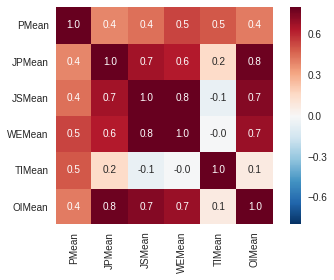

In [16]:
# Correlation Heatmap

sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

### Before we jump into building regression models. We need to test for normality of the data set.

In [17]:
# Testing for Normality 

import scipy.stats as stats

print stats.normaltest(df['PMean'])
print stats.normaltest(df['JPMean'])
print stats.normaltest(df['JSMean'])
print stats.normaltest(df['WEMean'])
print stats.normaltest(df['TIMean'])
print stats.normaltest(df['OIMean'])

NormaltestResult(statistic=7.8560132413935442, pvalue=0.019682868896983244)
NormaltestResult(statistic=16.209259157048812, pvalue=0.00030213712766665357)
NormaltestResult(statistic=25.137743353694088, pvalue=3.4786311931819757e-06)
NormaltestResult(statistic=32.464692380389806, pvalue=8.9203443825644254e-08)
NormaltestResult(statistic=21.453695808489375, pvalue=2.1947706656468013e-05)
NormaltestResult(statistic=26.277500890443051, pvalue=1.9674929395077405e-06)


In [18]:
# to print three decimals only. 
# Normality assumption is met becuase all p-values are less than .05.

Poly = stats.normaltest(df['PMean'])
JP = stats.normaltest(df['JPMean'])
JS = stats.normaltest(df['JSMean'])
WE = stats.normaltest(df['WEMean'])
TI = stats.normaltest(df['TIMean'])
OI = stats.normaltest(df['OIMean'])
print "The chi-square statistic is %.3f and the p-value is %.3f." % Poly
print "The chi-square statistic is %.3f and the p-value is %.3f." % JP
print "The chi-square statistic is %.3f and the p-value is %.3f." % JS
print "The chi-square statistic is %.3f and the p-value is %.3f." % WE
print "The chi-square statistic is %.3f and the p-value is %.3f." % TI
print "The chi-square statistic is %.3f and the p-value is %.3f." % OI

The chi-square statistic is 7.856 and the p-value is 0.020.
The chi-square statistic is 16.209 and the p-value is 0.000.
The chi-square statistic is 25.138 and the p-value is 0.000.
The chi-square statistic is 32.465 and the p-value is 0.000.
The chi-square statistic is 21.454 and the p-value is 0.000.
The chi-square statistic is 26.278 and the p-value is 0.000.


#### Studies have shown that a person's preference of conducting multiple tasks within the same time block (Polychronicity) differs from man to women. Therefore, we will use t-test to examine the difference. 

In [19]:
#perfoming t-test on the sample. 
#p-value is greater than .05, therefore, we fail to reject Ho which indicates male and female do not differ in polychronicity.

female_p = df_poly[df_poly['Gender'] == 1]['PMean']
male_p = df_poly[df_poly['Gender'] == 2]['PMean']
stats.ttest_ind(female_p, male_p)
two_sample = stats.ttest_ind(female_p, male_p)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is 1.249 and the p-value is 0.213.


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


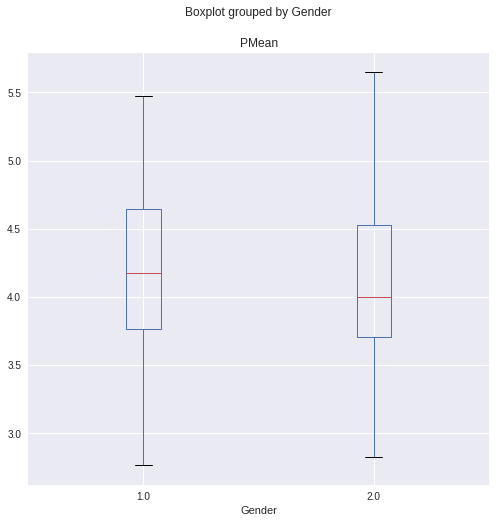

In [20]:
#Create a boxplot to visualize the result 
df_poly.boxplot('PMean', by='Gender', figsize=(8, 8))

### Now let's take a look at some how to use regression to develop models.
### Lasso Regression 

Gender
1.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

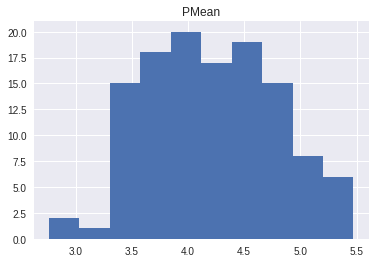

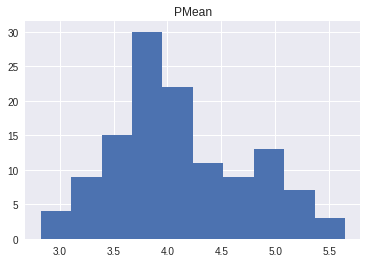

In [21]:
# create two graphs to see PMean by Gender 
df_poly.groupby('Gender').hist('PMean')

In [0]:
#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

In [0]:
#assigning columns to X and Y variables
y = df['TIMean'] 
X = df.drop(['TIMean'],axis =1)

In [0]:
#Fit the model
#higher alpha (penality parameter) means fewer predictors

model1 = linear_model.Lasso(alpha=0.5)    
model1.fit(X, y)
model1_y = model1.predict(X)

In [25]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 0.  0. -0. -0.  0.]
y-intercept  3.83354350567


In [26]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('PMean', '0.000'),
 ('JPMean', '0.000'),
 ('JSMean', '-0.000'),
 ('WEMean', '-0.000'),
 ('OIMean', '0.000')]

In [27]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.56066162147
variance or r-squared:  0.0


### f_regression/Feature regression 

In [28]:
#selec only 2 X variables
X_new = SelectKBest(f_regression, k=2).fit_transform(X, y)
X_new

array([[ 4.47058824,  3.78571429],
       [ 4.23529412,  4.42857143],
       [ 3.94117647,  5.21428571],
       [ 5.17647059,  4.64285714],
       [ 3.88235294,  4.5       ],
       [ 4.88235294,  4.28571429],
       [ 5.29411765,  5.14285714],
       [ 4.76470588,  4.57142857],
       [ 4.76470588,  4.71428571],
       [ 5.        ,  4.71428571],
       [ 3.35294118,  3.71428571],
       [ 4.76470588,  4.57142857],
       [ 4.23529412,  3.92857143],
       [ 3.47058824,  4.07142857],
       [ 4.58823529,  4.35714286],
       [ 4.29411765,  4.07142857],
       [ 4.11764706,  3.92857143],
       [ 4.17647059,  3.85714286],
       [ 3.47058824,  3.07142857],
       [ 4.        ,  4.28571429],
       [ 5.35294118,  5.28571429],
       [ 4.        ,  4.35714286],
       [ 3.88235294,  4.92857143],
       [ 4.82352941,  4.57142857],
       [ 4.        ,  5.        ],
       [ 3.        ,  3.21428571],
       [ 4.70588235,  4.42857143],
       [ 3.88235294,  3.85714286],
       [ 3.88235294,

In [29]:
# We can see that Polychronicity and Job performance were chosen as the two independent variables.
df.head()

,PMean,JPMean,JSMean,WEMean,TIMean,OIMean
1,4.470588,3.785714,3.250000,4.1250,3.769231,3.692308
2,4.235294,4.428571,4.333333,4.8125,4.538462,4.461538
3,3.941176,5.214286,4.916667,5.4375,4.153846,5.076923
4,5.176471,4.642857,4.666667,5.1250,4.846154,4.615385
5,3.882353,4.500000,4.583333,4.5000,2.923077,3.923077


In [30]:
model2 = lm.LinearRegression()
model2.fit(X_new, y)
model2_y = model2.predict(X_new)

print "mean square error: ", mean_squared_error(y, model2_y)
print "variance or r-squared: ", explained_variance_score(y, model2_y)

mean square error:  0.419266831553
variance or r-squared:  0.252192738904


#### R-suqare is 25% which means polychronicity and job performance explain 25% of the variance in turnover intention.

### Recursive Feature Selection (RFE)

In [31]:
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2) # list all the variables that are important (decent order)to predicting y value.
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'PMean'), (1, 'WEMean'), (2, 'JPMean'), (3, 'JSMean'), (4, 'OIMean')]


#### Based on the results of RFE, it seemed like polychronicity and work engagement are the two predictors that explain most of the variance in turnover intention. Compared to f_regression (polychronicity and job performane), the model suggestions look quite different. Let's use Ramdom Forest Regressor and see if it can help verify the model. 

### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [34]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.10133456425175003, 'OIMean'),
 (0.1296008012342697, 'JPMean'),
 (0.15949664274748993, 'JSMean'),
 (0.19040526777985589, 'WEMean'),
 (0.4191627239866344, 'PMean')]

In [35]:
## this one does not have coefficient values cause it is a decision tree not a linear regression
print ("Residual sum of squares: %.2f" %
        np.mean((regr.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print ('Variance score: %.2f' % regr.score(X, y))

Residual sum of squares: 0.07
Variance score: 0.87


#### It seems like Ramdom Forest Regressor suggests to use polychronicity and work engagement as two of the most importtant predictors of the model.
#### Since both RFE and Random Forest suggest polychoronicity and work engagement as predictors of turnover intention, we will build our model using these three variables. 

In [0]:
#First Model
runs_reg_model1 = sm.ols("TIMean~PMean+WEMean",df)
runs_reg1 = runs_reg_model1.fit()
#Second Model
runs_reg_model2 = sm.ols("TIMean~WEMean",df)
runs_reg2 = runs_reg_model2.fit()
#Third Model
runs_reg_model3 = sm.ols("TIMean~PMean",df)
runs_reg3 = runs_reg_model3.fit()

#### Now let's look at R-square of different models that contain different number of predictors based on previous literature review.

In [37]:
print runs_reg1.summary()
print runs_reg2.summary()
print runs_reg3.summary()

                            OLS Regression Results                            
Dep. Variable:                 TIMean   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     68.72
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           2.43e-24
Time:                        01:11:34   Log-Likelihood:                -220.57
No. Observations:                 244   AIC:                             447.1
Df Residuals:                     241   BIC:                             457.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2210      0.304      7.313      0.0

#### Seems like the first model which contains polychronicity and work engagement explains the highest variance in turnover intention with the least number of predictors. We will use polychronicty and work engagement as predictors. 

### Based on the correlation and regresison analysis, we concluded  that:
1. Polychronicity positively correlates with work engagement, meaning the more polychronic-oriented the servers were, the more they engaged with their job. 
2. Polychronicity positively correaltes with turnover intention, meaning the more polychonic-oriented the servers were, the more likely they were to leave their organization. This is an interesting finiding which contradicts with previous literature. Consider polychronic-oriented employees believe in switching and engaging with multiple tasks, they might like to involve themselves with more than one job and therefore be more active in the job market, constantly looking for better career opportunities and more challenging work roles. 
3. Work engagement negatively corealates with turnover intention, meaning the more engaged the servers were with their jobs, the less likely they were to leave their organization. 

Based on the finding of this study, we suggest:
1. Management should conduct tests to assess candidates’ level of polychronicity in order to better place candidates with jobs that will capitalize on their abilities
2. Once appropriate candidates are hired, the key is to reatain polychronic-oriented servers through high level of work engagement. 
3. Management could try to assign busier section of the restaurant or assign an extra table to highly performed polychronic-oriented servers. Also, providing them with career development opportunities such as promotion to a bartender, a shift leader, or even a manager might be considered in order to motivate and enhance level of challenge and work engagement of polychronic-oriented employees. 

**Data Visualization** of analysis to show each of the variables against the PMean (using PairPlot), the WE and TI mean against the PMean (scatter plot), and finally, linear regression/scatter chart for the same.

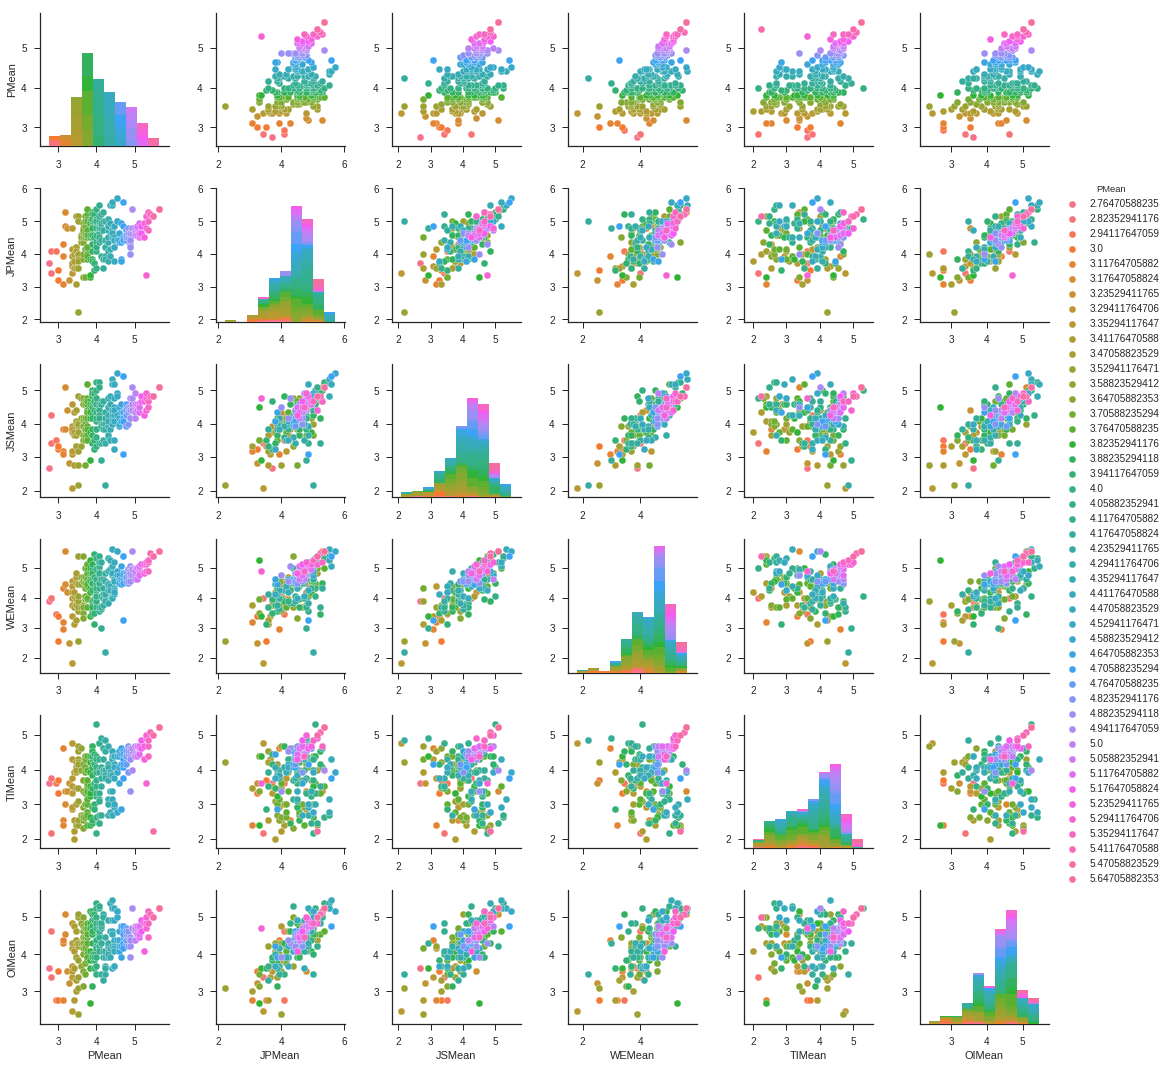

In [211]:
# Using PairPlot to show all means against PMean
sns.set(style="ticks")
sns.pairplot(df, hue="PMean")

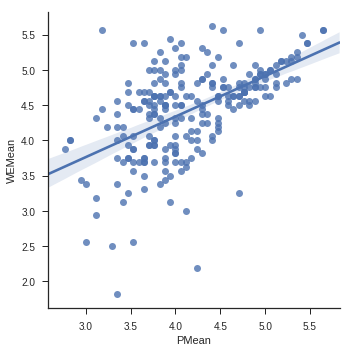

In [207]:
# Scatter plot to show WEMean against PMean
sns.lmplot('PMean', 'WEMean', data=df, fit_reg=True)

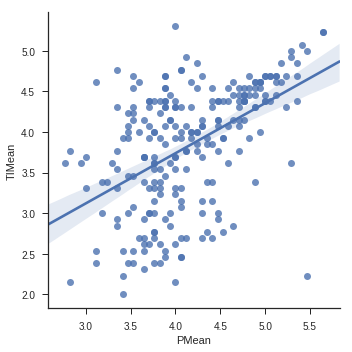

In [208]:
# Scatter plot to show TIMean against PMean 

sns.lmplot('PMean', 'TIMean', data=df, fit_reg=True)

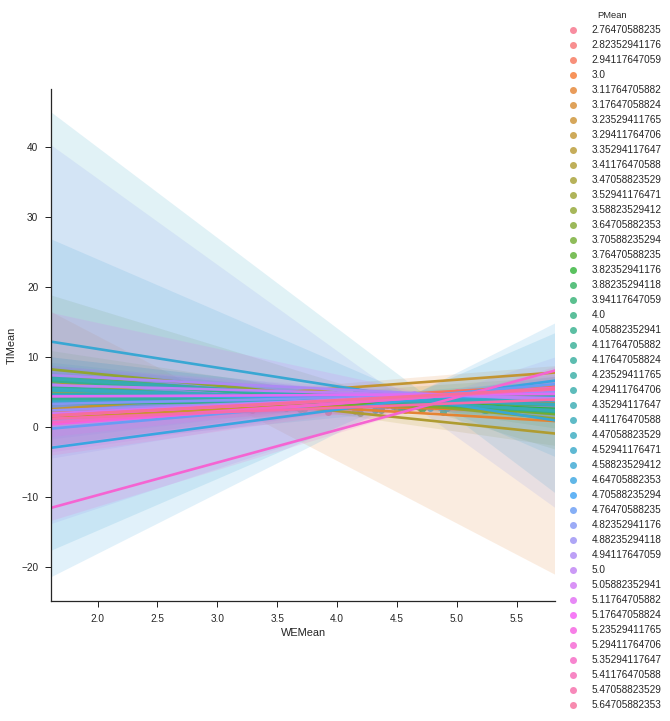

In [209]:
# linear regression & scatter chart for Work Engagement and Turnover Intention
# use Polychronicity as groups or hue
sns.lmplot("WEMean", "TIMean", df, hue="PMean", x_jitter=.15, size=8)

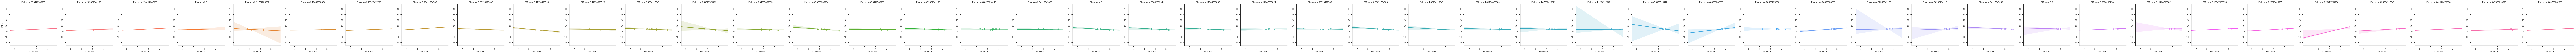

In [210]:
# Individual charts to show further breakdown of Work Engagement, Turnover Intention and their correlation to Polychronicity.
sns.lmplot("WEMean", "TIMean", df, col="PMean", hue="PMean", x_jitter=.15, size=4)